## Select routes for GTFS-RT comparison

Play with `pct_route` cut-off threshold, which is % of transit route that is "parallel" to SHN (with 1 mile buffer around SHN). 0.6 would indicate 60% of that transit's route runs within parallel to SHN.

Currently: `parallel==1` if at least 30% of the transit route runs parallel to SHN **and** that length covers at least 10% of the highway. 

But, can play with cut-offs to grab a much smaller subset of routes.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

import shared_utils
import utils

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf = shared_utils.utils.download_geoparquet(utils.GCS_FILE_PATH, 
                                             "parallel_or_intersecting")

In [3]:
gdf = gdf[gdf.parallel == 1].reset_index(drop=True)

In [4]:
# LA Metro
gdf = gdf[gdf.itp_id==182].reset_index(drop=True)

for c in [0.4, 0.5, 0.6]:
    rows = len(gdf[gdf.pct_route >= c])
    print(f"# routes for LA Metro with {c} cut-off: {rows}")

# routes for LA Metro with 0.4 cut-off: 62
# routes for LA Metro with 0.5 cut-off: 49
# routes for LA Metro with 0.6 cut-off: 39


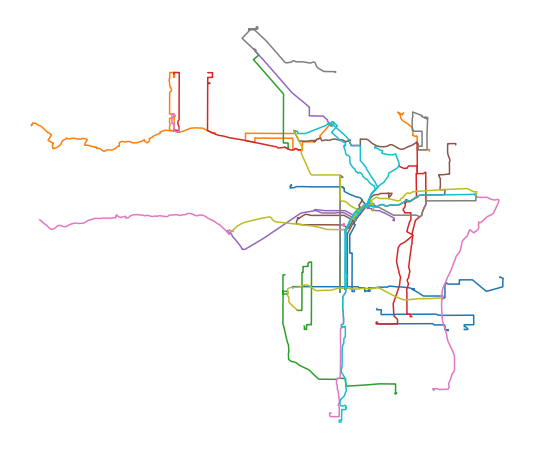

In [5]:
CUTOFF = 0.6

fig, ax = plt.subplots(figsize  = (12, 8))
gdf[(gdf.pct_route >= CUTOFF)].plot(column="route_id", ax = ax)
ax.set_axis_off()
display(fig)
plt.close()